# K-Means

In [72]:
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.cluster import KMeans
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [86]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
print X

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.6]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

In [74]:
#print L
#pd.DataFrame(X,columns=iris['feature_names'][:2]).head()

In [75]:
kmeans = KMeans(n_clusters=3).fit(X)

cost = kmeans.inertia_
predict = kmeans.predict(X)
rmse = np.sqrt(mean_squared_error(y, predict))


print cost
print predict
print rmse
#print kmeans.labels_

37.0507021277
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
1.03279555899


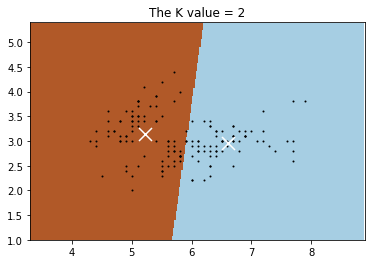

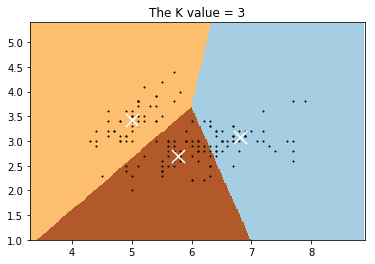

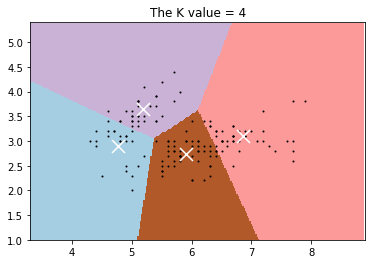

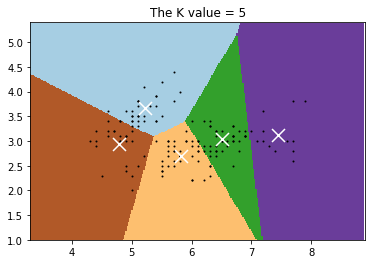

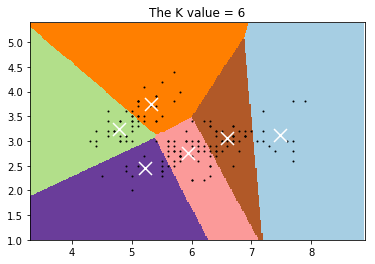

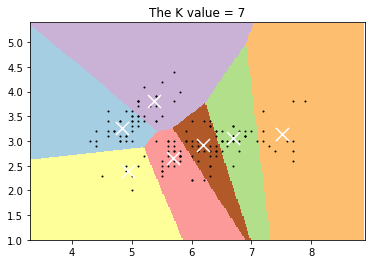

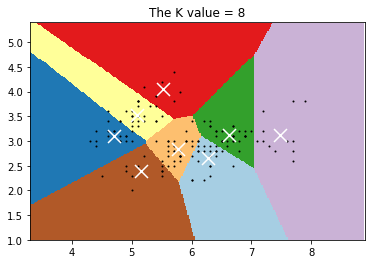

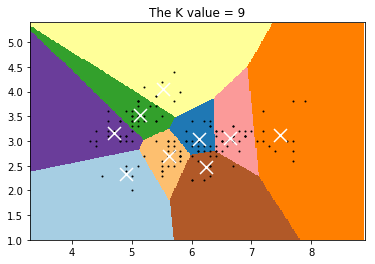

[58.204092789066713, 37.050702127659576, 27.990212038303699, 21.04161783226586, 17.36509523809524, 15.132303501781445, 12.85919247824522, 11.127189109136479]


In [76]:
cost_history = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(X)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
   # plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
      #        'Centroids are marked with white cross')
    plt.title("The K value = " + str(k))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    #plt.xticks(())
    #plt.yticks(())
    cost_history.append(kmeans.inertia_)
    plt.show()
print cost_history

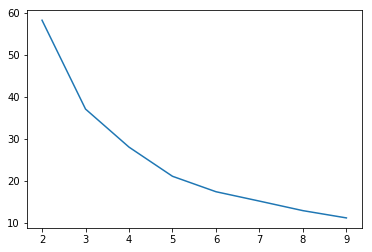

In [78]:
#The K vs cost function

x = [x for x in range(2,10,1)]
y = cost_history

plt.plot(x,y)
plt.show()

3.29363714704
3.27145261673
[[ 5.19052473  2.75910945]
 [ 3.29363715  3.27145262]]
cost
[ 11.74102564   6.10512821]
cost
[ 23.50117897  12.21042327]
cost
[ 35.27992897  18.31417327]
cost
[ 47.07719145  24.41540783]
cost
[ 58.87445393  30.5166424 ]


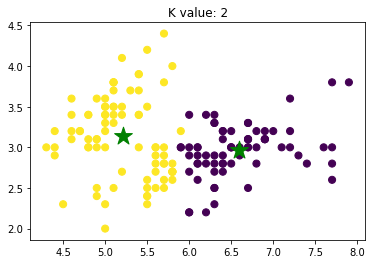

cost
[ 17.23315234   9.05785822]
cost
[ 34.58091431  18.18710637]
cost
[ 52.01300129  27.34510078]
cost
[ 69.52893566  36.53255256]
cost
[ 87.10048053  45.71968717]
cost
[ 104.69283139   54.91460809]
cost
[ 122.28518226   64.10952901]


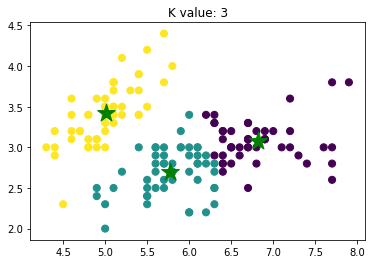

cost
[ 24.22554244  12.3346769 ]
cost
[ 48.12377116  24.91966812]
cost
[ 71.80604227  37.56517453]
cost
[ 95.23654998  50.20678856]
cost
[ 118.44230241   62.91432403]
cost
[ 141.50270475   75.64222689]
cost
[ 164.47296666   88.28990996]
cost
[ 187.37169485  100.84387479]
cost
[ 210.23827953  113.34907109]
cost
[ 233.05758135  125.83328975]
cost
[ 255.86106489  138.2917558 ]
cost
[ 278.66454843  150.75022186]


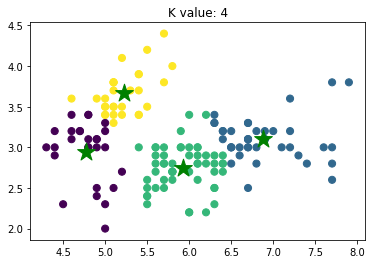

cost
[ 27.42570513  14.73931624]
cost
[ 55.79254642  29.48379236]
cost
[ 84.63046621  44.21040917]
cost
[ 113.58392468   58.99247675]
cost
[ 142.58522097   73.95107132]
cost
[ 171.67363787   89.10878572]
cost
[ 200.86859553  104.33531626]
cost
[ 230.20420344  119.63869116]
cost
[ 259.57465799  134.9497707 ]
cost
[ 288.9825338   150.26202969]
cost
[ 318.42589336  165.58900757]
cost
[ 347.92060851  180.9398833 ]
cost
[ 377.41532367  196.29075903]


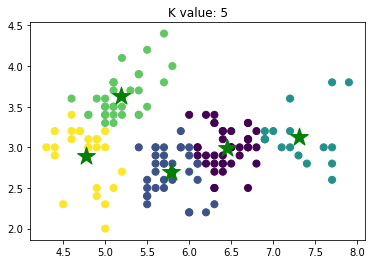

cost
[ 34.54277102  17.98408774]
cost
[ 69.29126003  36.29131801]
cost
[ 104.08134108   54.60224744]
cost
[ 138.89535207   72.83586161]
cost
[ 173.6560408    90.93179397]
cost
[ 208.41672953  109.02772633]


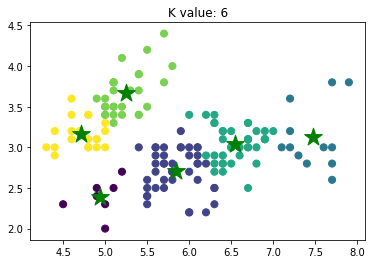

cost
[ 42.69892276  21.53978659]
cost
[ 85.30813468  42.94715649]
cost
[ 127.94513468   64.30123983]
cost
[ 170.63363089   85.59883344]
cost
[ 213.48330039  106.84209067]
cost
[ 256.45788935  128.02271475]
cost
[ 299.44947079  149.18435386]
cost
[ 342.48913702  170.33303873]
cost
[ 385.59210857  191.39806347]
cost
[ 428.74854803  212.42721864]
cost
[ 471.97190053  233.42157671]
cost
[ 515.24668161  254.3902205 ]
cost
[ 558.54717697  275.35757857]
cost
[ 601.84767233  296.32493664]


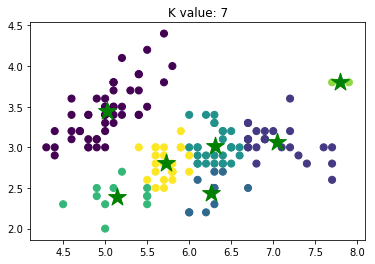

cost
[ 48.738549    23.15896104]
cost
[ 97.33333246  46.57760315]
cost
[ 145.85948651   70.04868418]
cost
[ 194.38564057   93.51976521]


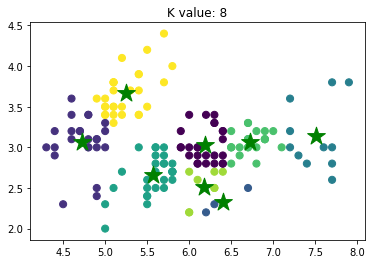

cost
[ 55.2562851   27.39900183]
cost
[ 110.07353944   54.98557931]
cost
[ 164.58129338   82.32609947]
cost
[ 218.93803581  109.41865969]
cost
[ 273.24689403  136.38966077]
cost
[ 327.53382155  163.33480958]
cost
[ 381.82074907  190.27995839]


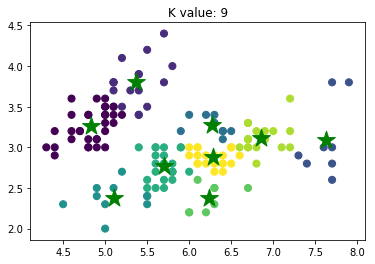

In [112]:
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances

k = 2
c = X.shape[1]

mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
centers = np.random.randn(k,c)*std + mean

print centers[1][0]
print centers[1][1]
print centers

dist = 0

def cost_function(X, centers):
    m = len(centers)
    sum = 0
    for p in range(m):
        for i in range(m):
            sum = sum + np.sqrt((centers[i][0] - X[i][p])**2 + (centers[0][i] - x[p][i])**2)
    return dist

#initial_cost = cost_function(X_train, y_train, B)
#print(initial_cost)
    
#rmse = np.sqrt(mean_squared_error(y_validation, data_prediction_validate))

    
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    centers = np.random.randn(n_clusters,c)*std + mean
    
    #rng = np.random.RandomState(rseed)
    #i = rng.permutation(X.shape[0])[:n_clusters]
    #centers = rng
    #print rng
    #print X
    #print centers
    cost = 0
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        distances = pairwise_distances(X, centers)
        
        for i in range(n_clusters):
            cost = cost + X[labels == i].mean(0)
        print "cost"
        print cost
                

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    #print labels
    #print distances
        #print y
    cost_history.append(cost)
    #rmse = np.sqrt(mean_squared_error(y, labels))

    return centers, labels
k=2
for k in range(2,10,1):
    centers, labels = find_clusters(X, k)
    plt.scatter(X[:, 0], X[:, 1], c=labels,
                s=50, cmap='viridis');
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=350)
    plt.title("K value: " + str(k))
    plt.show()
    #print labels
    
#print labels


In [113]:
#The K vs cost function

x = [x for x in range(2,10,1)]
y = cost_history

plt.plot(x,y)
plt.show()

ValueError: setting an array element with a sequence.